In [1]:
# --- Import required libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# --- Load dataset ---
dataset = pd.read_csv("house_price_dataset.csv")

In [3]:
# --- Quick look at the dataset ---
dataset.head()          # Show first 5 rows
dataset.info()          # Column types & non-null counts
dataset.isnull().sum()  # Check missing values
dataset.describe()      # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [4]:
# --- Feature selection ---
features = ["Square_Footage","Num_Bedrooms","Num_Bathrooms","Year_Built","Lot_Size","Garage_Size","Neighborhood_Quality"]
target = ["House_Price"]
X = dataset[features]
Y = dataset[target]

In [5]:
# --- Train-test split ---
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [6]:
# --- Scale features (important for neural networks) ---
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [7]:
# --- Model 1: Without activation functions (linear layers only) ---
tf.random.set_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(50),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)])

# Compile model with MAE as loss
model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Train model
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 613995.8125 - mae: 613995.8125
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 613994.1250 - mae: 613994.1250
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 613988.5000 - mae: 613988.5000
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 613966.6250 - mae: 613966.6250 
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 613900.6250 - mae: 613900.6250 
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 613744.6250 - mae: 613744.6250 
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 613435.6875 - mae: 613435.6875 
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 612894.3750 - mae: 612894.3750 
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 612025.2500 - mae: 612025.2500 
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 610717.4375 - mae: 610717.4375 
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 608845.8750 - mae: 608845.8750 
Epoch 12/50

In [8]:
# Evaluate on test data
loss_1, mae_1 = model.evaluate(x_test, y_test, verbose=0)
print(f"\nModel 1 Performance:\nMean Absolute Error: {mae_1:.2f}")


Model 1 Performance:
Mean Absolute Error: 9116.72


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


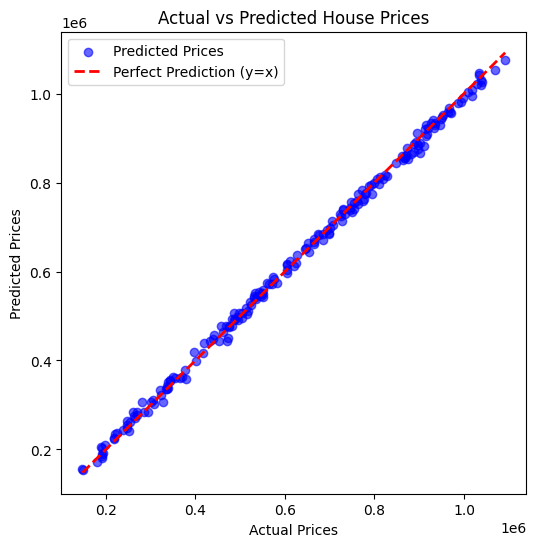

KeyError: 'val_loss'

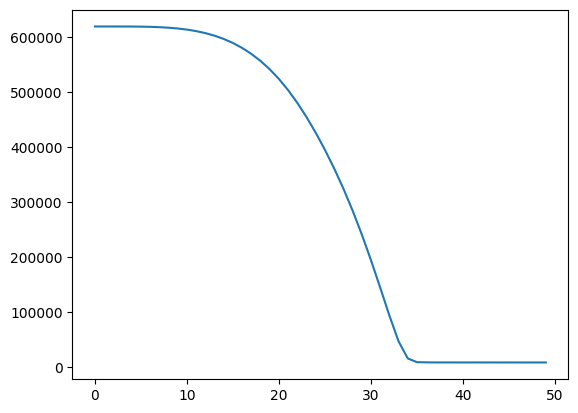

In [9]:
# --- Predictions using Model 1 ---
y_pred_1 = model.predict(x_test).flatten()  # Flatten to 1D array for plotting

# --- Visualization: Predicted vs Actual ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_1, alpha=0.6, color="blue", label="Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Prediction (y=x)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

# --- Visualization: Training vs Validation Loss ---
plt.plot(history.history["loss"], label="Train Loss (MAE)")
plt.plot(history.history["val_loss"], label="Validation Loss (MAE)")
plt.xlabel("Epochs")
plt.ylabel("Loss (MAE)")
plt.legend()
plt.title("Training & Validation Loss (Model 1)")
plt.show()

In [10]:
# --- Model 2: With ReLU activation functions in hidden layers ---
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)   # Still linear output
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

history_2 = model_2.fit(x_train, y_train, validation_split=0.2, epochs=50, verbose=1)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 619770.0000 - mae: 619770.0000 - val_loss: 616848.3125 - val_mae: 616848.3125
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 619767.6875 - mae: 619767.6875 - val_loss: 616843.6875 - val_mae: 616843.6875
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 619761.6875 - mae: 619761.6875 - val_loss: 616832.3750 - val_mae: 616832.3750
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 619747.8750 - mae: 619747.8750 - val_loss: 616808.1875 - val_mae: 616808.1875
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 619718.8125 - mae: 619718.8125 - val_loss: 616761.1250 - val_mae: 616761.1250
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 619663.6875 - mae: 619663.6875 - val_loss: 616677.3125 - val_mae: 616677.3125
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 619567.1875 - mae: 619567.1875 - val_loss: 616538.5625 - val_mae: 616538.5625
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st

In [11]:
# Evaluate Model 2
loss_2, mae_2 = model_2.evaluate(x_test, y_test, verbose=0)
print(f"\nModel Performance:\nMean Absolute Error: {mae_2:.2f}")


Model Performance:
Mean Absolute Error: 127437.14


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


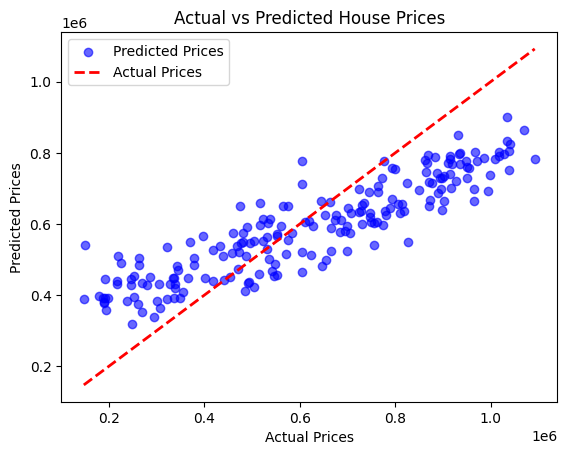

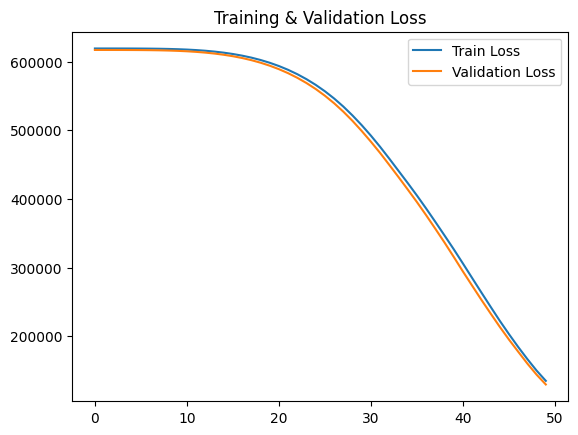

In [12]:
# ---- Predictions using Model 2----
y_pred_2 = model_2.predict(x_test).flatten()

# --- Visualization: Predicted vs Actual ---
plt.scatter(y_test, y_pred_2, alpha=0.6, color="blue", label="Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()


# --- Visualization: Training vs Validation Loss ---
plt.plot(history_2.history["loss"], label="Train Loss")
plt.plot(history_2.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

In [14]:
# Model 1 evaluation
mae_1 = mean_absolute_error(y_test, y_pred_1)   # Mean Absolute Error
mse_1 = mean_squared_error(y_test, y_pred_1)    # Mean Squared Error

# Model 2 evaluation
mae_2 = mean_absolute_error(y_test, y_pred_2)
mse_2 = mean_squared_error(y_test, y_pred_2)

# ✅ Store results in a DataFrame for comparison
model_result = [
    ["Model 1", mae_1, mse_1],
    ["Model 2", mae_2, mse_2]
]

result = pd.DataFrame(model_result, columns=["Model", "MAE", "MSE"])
print(result)

     Model            MAE           MSE
0  Model 1    9116.718750  1.222907e+08
1  Model 2  127437.140625  2.186279e+10


Observation:

Model 1 performs much better than Model 2, with a significantly lower MAE (9058 vs. 513074) and MSE (1.2e+08 vs. 3.3e+11).

The lower error values indicate that Model 1’s predictions are far closer to the actual values, while Model 2 shows very high error, meaning it is not suitable for this dataset.

Therefore, Model 1 is the preferred model.